#Yulu Hypothesis


1. Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, levene, shapiro, kruskal
from statsmodels.graphics.gofplots import qqplot


In [ ]:
df = pd.read_csv('bike_sharing.csv')


In [ ]:
# Display the shape of the dataset
print("Dataset Shape:", df.shape)

# Display information about the dataset
print("\nDataset Information:")
df.info()

# Display statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())


Dataset Shape: (10886, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB

Statistical Summary:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("\nMissing Values:")
print(missing_values)





Missing Values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
# Check for duplicate records
duplicate_rows = df[df.duplicated()]

# Display duplicate records
print("\nDuplicate Records:")
print(duplicate_rows)

# Remove duplicates
df.drop_duplicates(inplace=True)



Duplicate Records:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


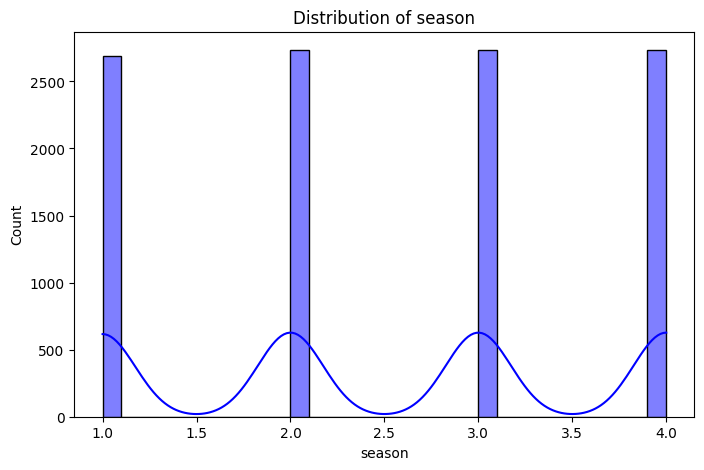

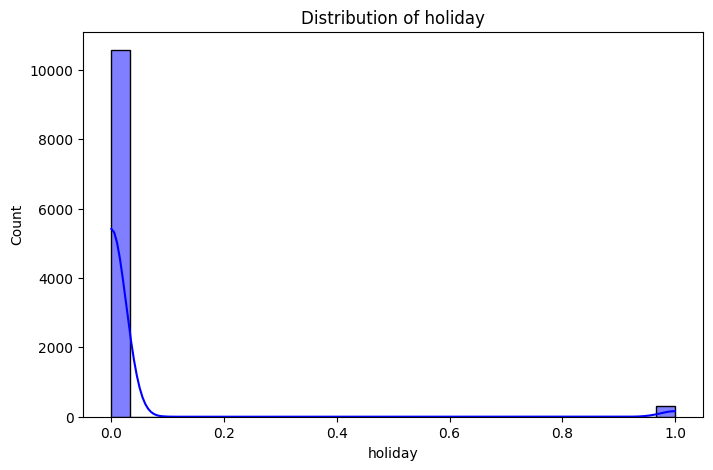

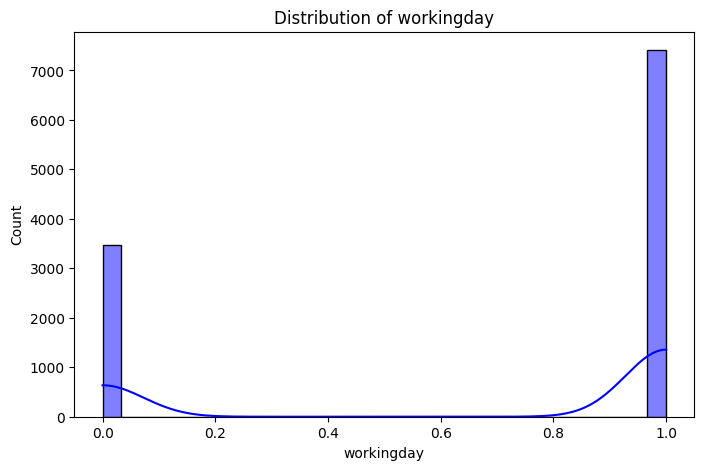

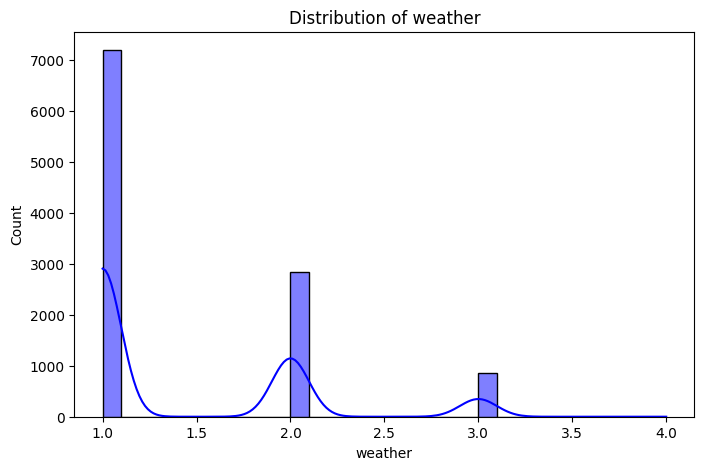

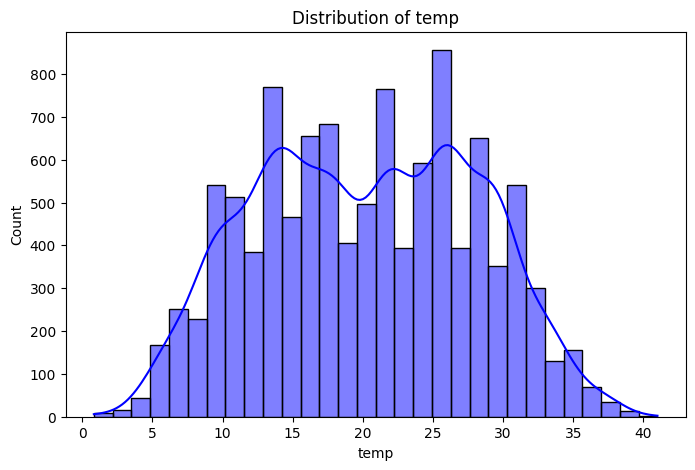

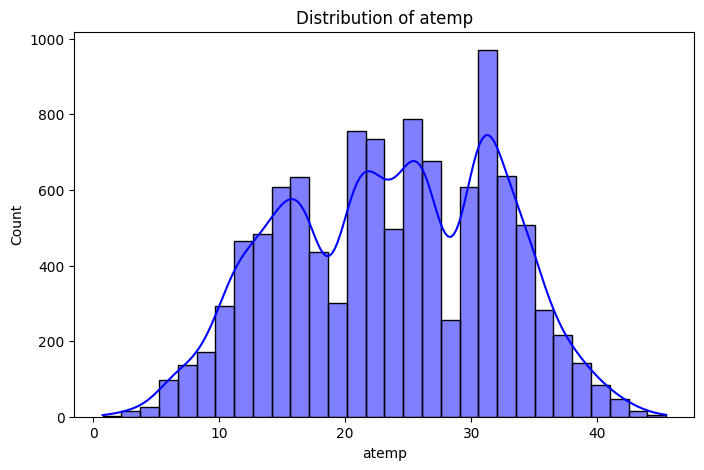

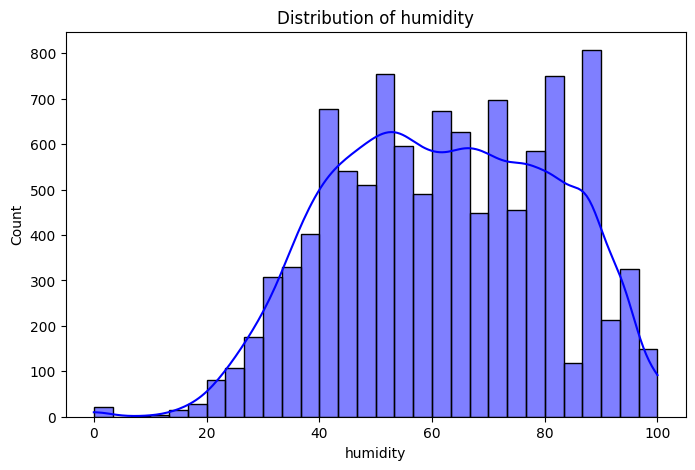

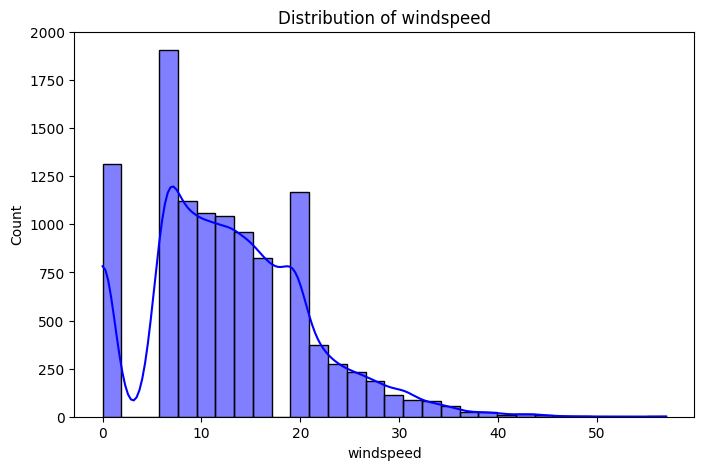

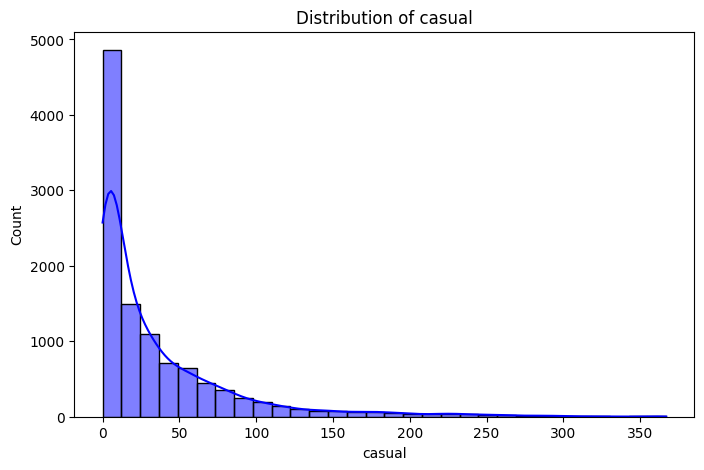

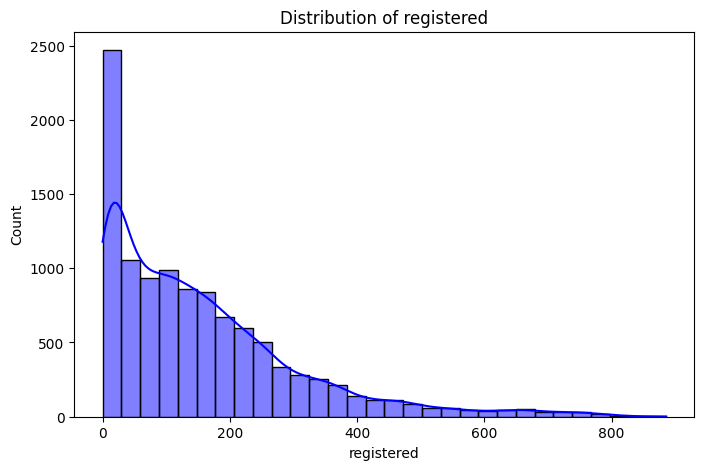

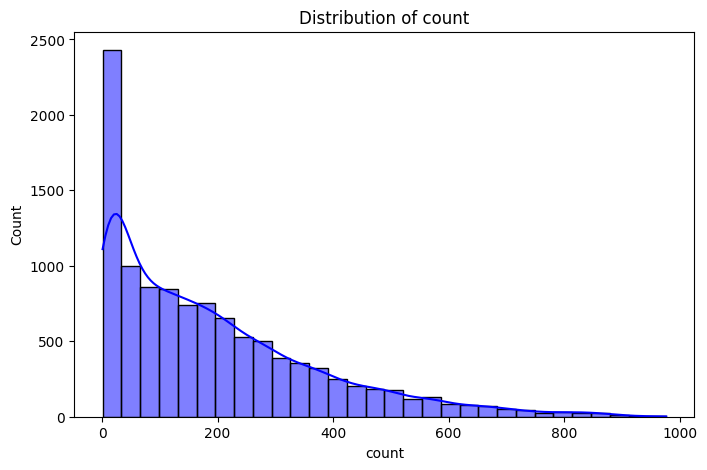

<ipython-input-12-c6ce68ee7938>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


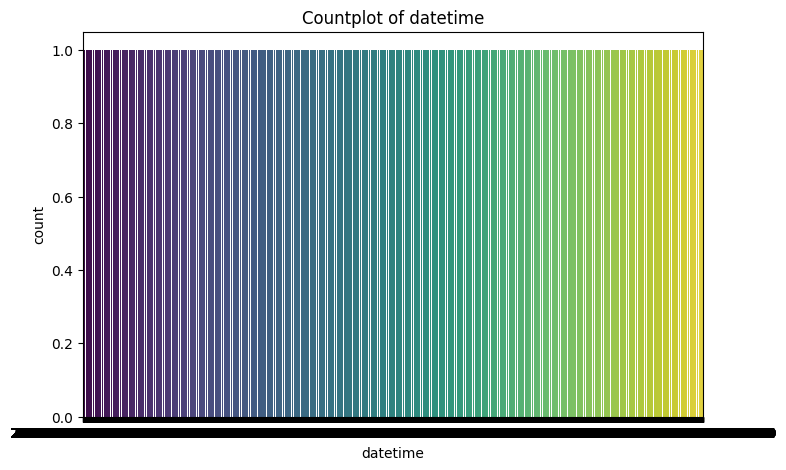

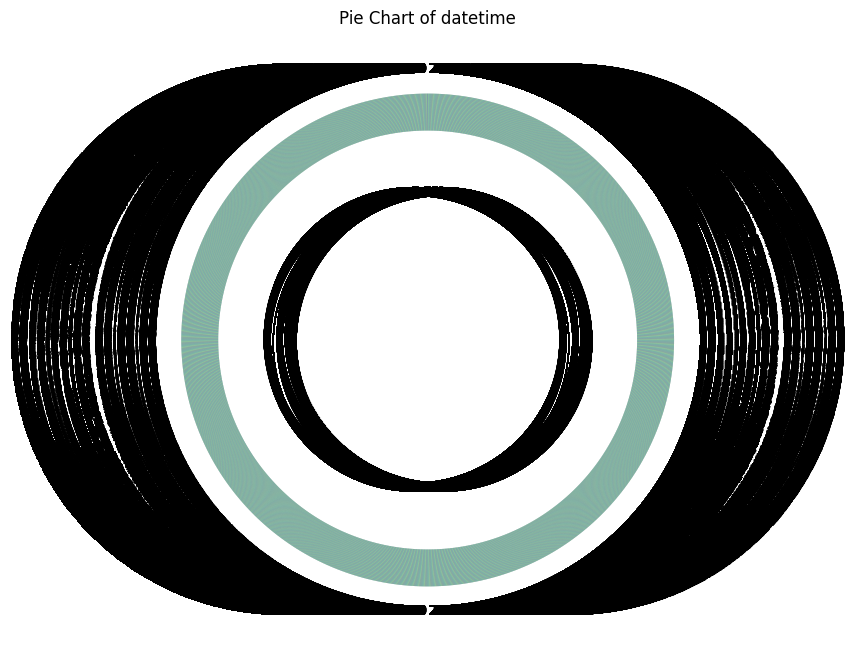

In [ ]:
# Numerical features - Histogram and Distplot
numerical_features = df.select_dtypes(include=np.number).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Categorical features - Countplot and Pie Chart
categorical_features = df.select_dtypes(include='object').columns
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Countplot of {feature}')
    plt.show()

    plt.figure(figsize=(8, 8))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.15))
    plt.title(f'Pie Chart of {feature}')
    plt.ylabel('')
    plt.show()



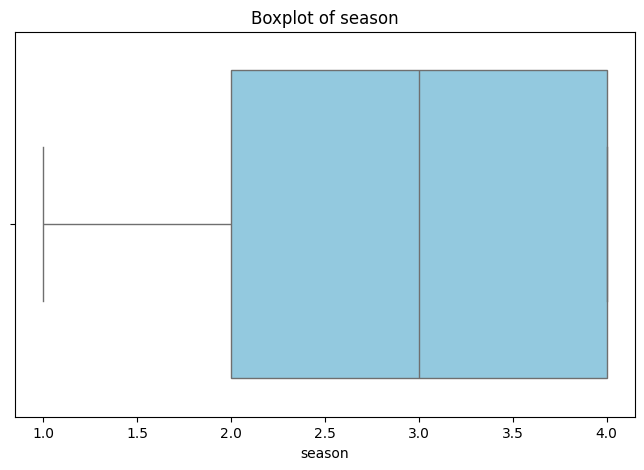

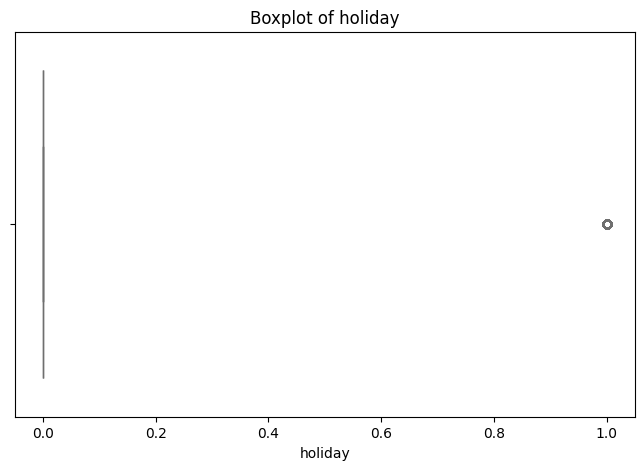

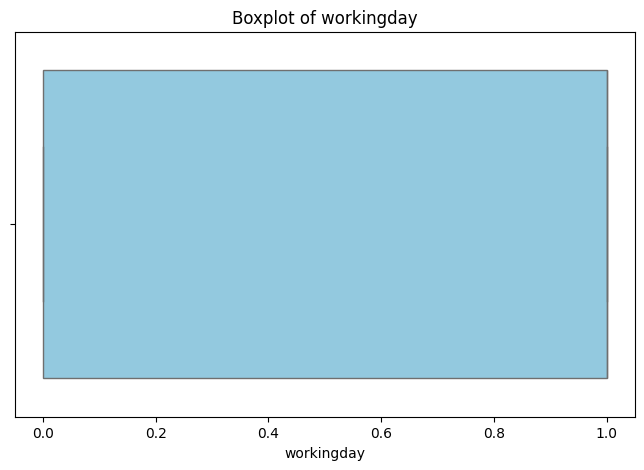

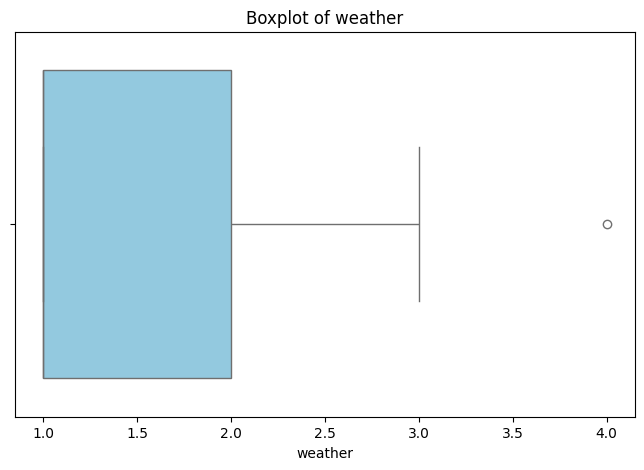

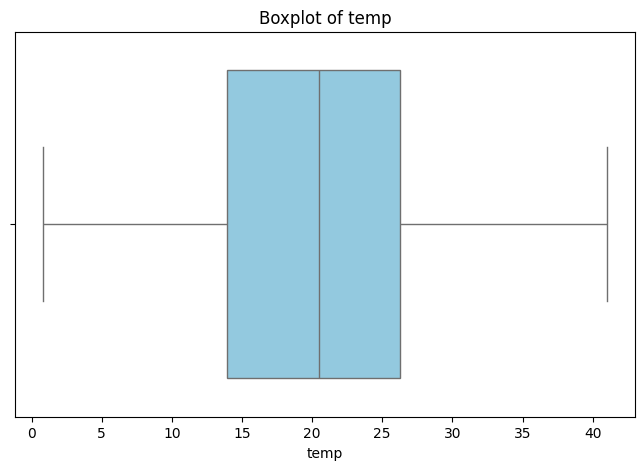

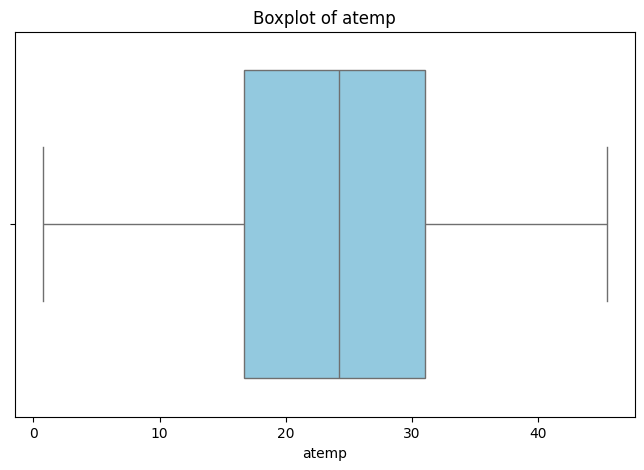

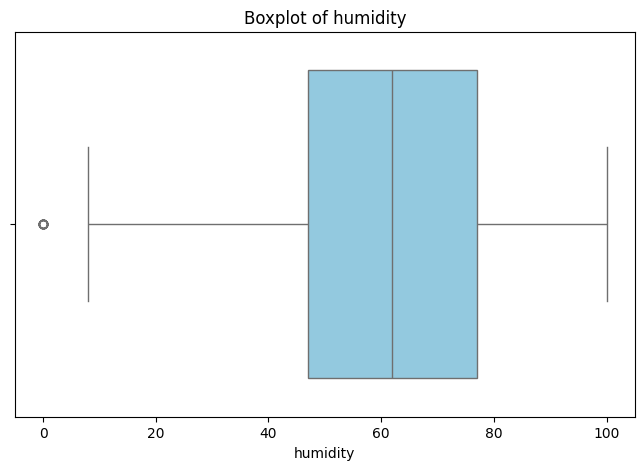

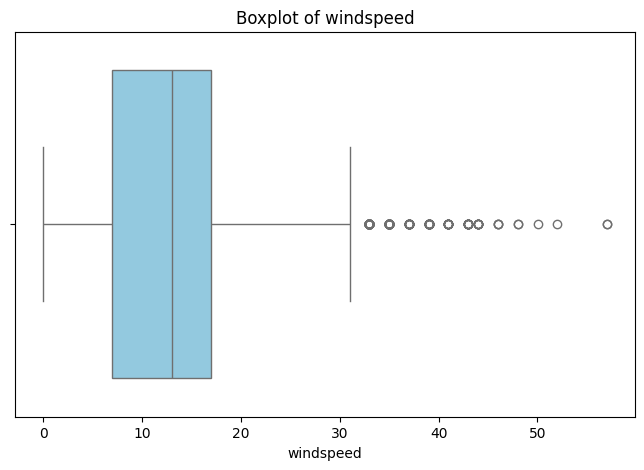

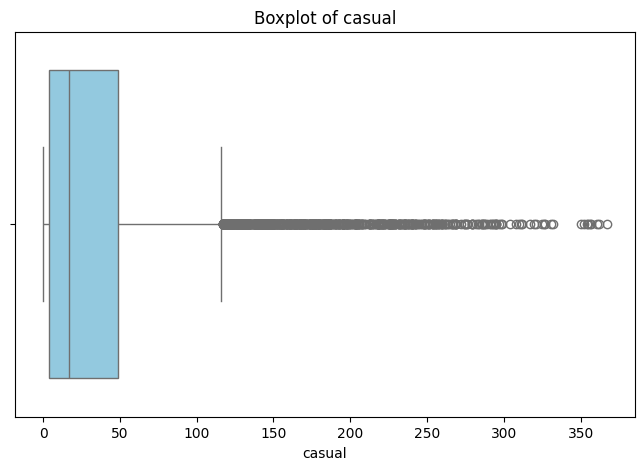

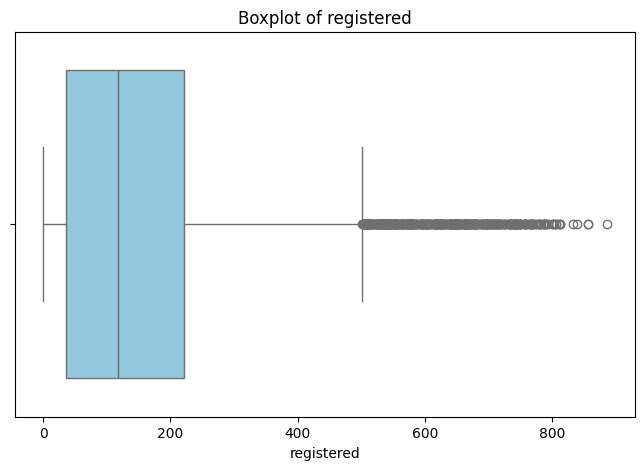

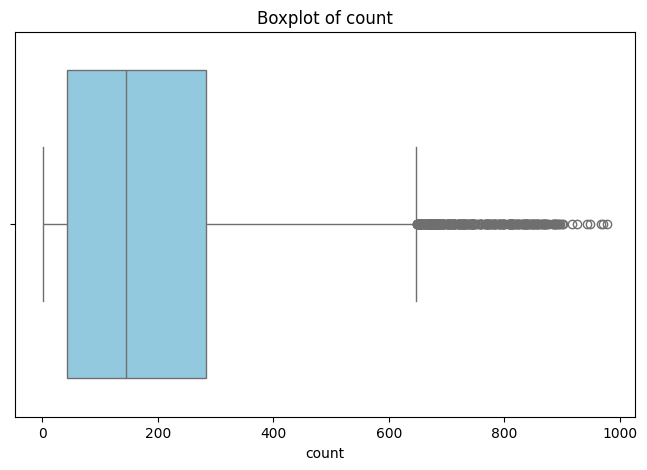

In [ ]:
# Numerical features - Boxplot and IQR
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.show()

    # Calculate IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Remove or clip outliers
    df[feature] = np.where((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)), df[feature].median(), df[feature])


2. Try establishing a Relationship between the Dependent and Independent Variables.

i. Plot a Correlation Heatmap and draw insights.
ii. Remove the highly correlated variables, if any.

<ipython-input-14-062546f54784>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


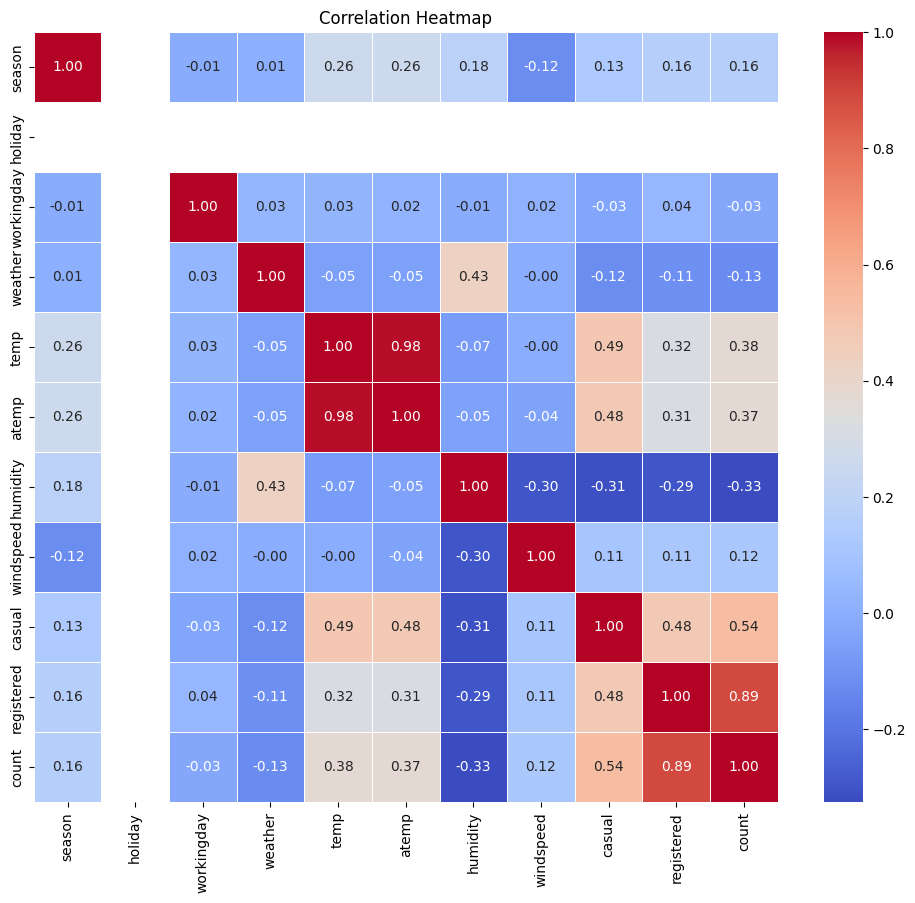

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Check if there any significant difference between the no. of bike rides on Weekdays
and Weekends?

a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

•HO:- There is no significant diffence between the number of bike rides on weekdays and weekends.

H1:- There is a significant difference between the number of bike rides on Weekdays and Weekends.


In [ ]:
#significance level

alpha= 0.05

Sample Independent T-test

In [ ]:
data1 = df[df['workingday'] == 1]
weekdays = data1['count'].astype('int')
weekdays


47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

In [ ]:
sample_mean1 = weekdays.mean()
sample_mean1

172.06300593631948

In [ ]:
data2 = df[df['workingday'] ==0 ]
weekends = data2['count'].astype('int')
weekends


0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3474, dtype: int64

In [ ]:
sample_mean2 = weekends.mean()
sample_mean2

180.86067933218192

In [ ]:
test_statistics, p_value = ttest_ind (weekdays, weekends, alternative ='two-sided')

In [ ]:
test_statistics

-2.7743551537766913

In [ ]:
p_value

0.005540553589361102

In [ ]:
if alpha > p_value:
  print("Reject Null, we can conclude that there is a difference between the number of bike ride")
else:
  print("Fail to reject null hypothesis, we can conclude that there is no difference")


Reject Null, we can conclude that there is a difference between the number of bike ride


4. Check if the demand of bicycles on rent is the same for different Weather
conditions?

Formulate Hypothesis

• HO:- The demand of bicycles on rent is not same for different weather conditions.

• H1:- The demand of bicycles on rent is same for different weather conditions.


In [ ]:
#significance level

alpha = 0.05


In [ ]:
#Select One-way ANOVA test for the test.

w1 = df[df['weather'] == 1]['count']
w2 = df[df['weather'] == 2]['count']
w3 = df[df['weather'] == 3]['count']
w4 = df[df['weather'] == 4]['count']




Test for variance

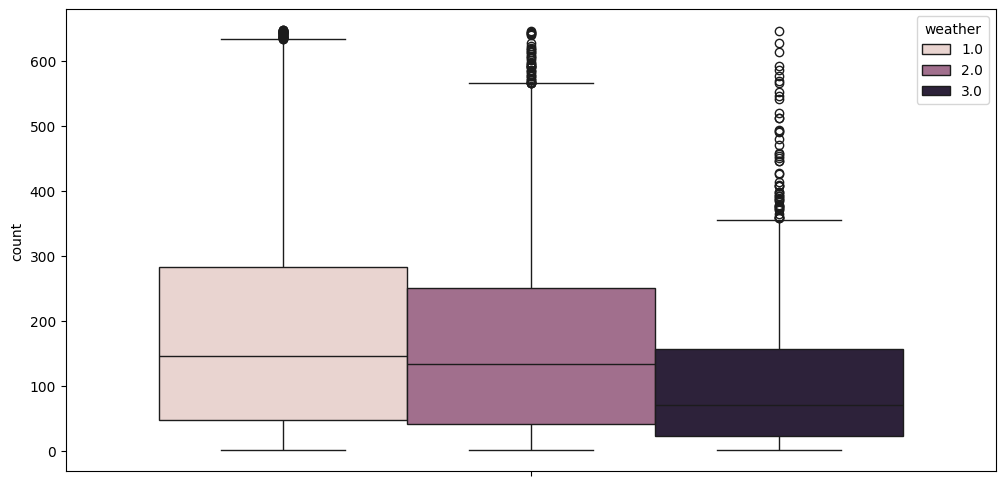

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df,y='count' ,hue = 'weather')
plt.show()

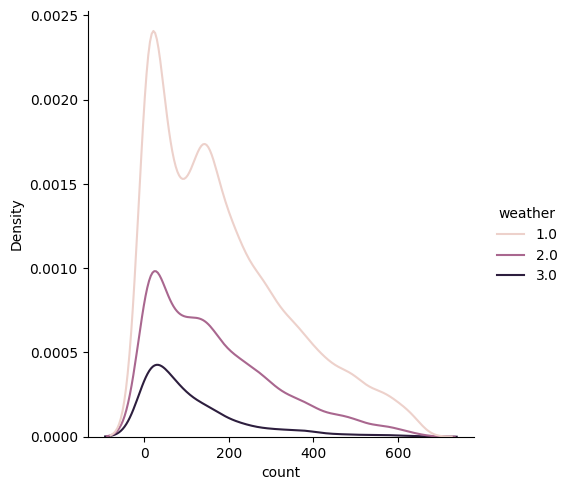

In [ ]:
sns.displot(data = df, x = 'count', hue = 'weather', kind = 'kde')
plt.show()

Observation

• Variance within each group is not same.

Statistical test for variance using levene

• HO:- Variance are same.

• H1:- Variance are different


In [ ]:
alpha = 0.05


In [ ]:
test_statistics, p_value = levene(w1, w2, w3, w4)


In [ ]:
test_statistics

nan

In [ ]:
p_value

nan

Test for Normality

In [ ]:
data1 = np.random.normal(0,1,10886)


In [ ]:
df['count_z'] = (df['count'] - df['count'].mean()) / df['count'].std()


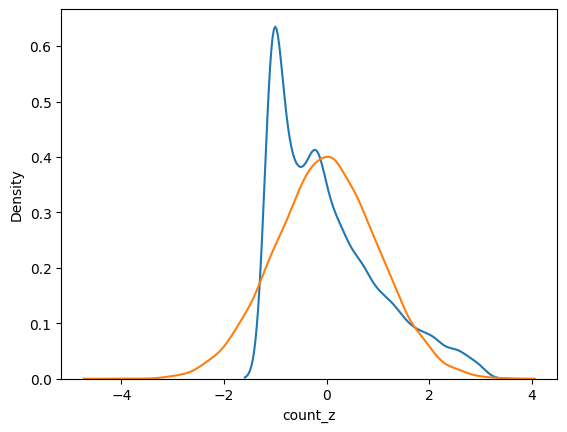

In [ ]:
sns.kdeplot(df['count_z'])
sns.kdeplot(data1)
plt.show()


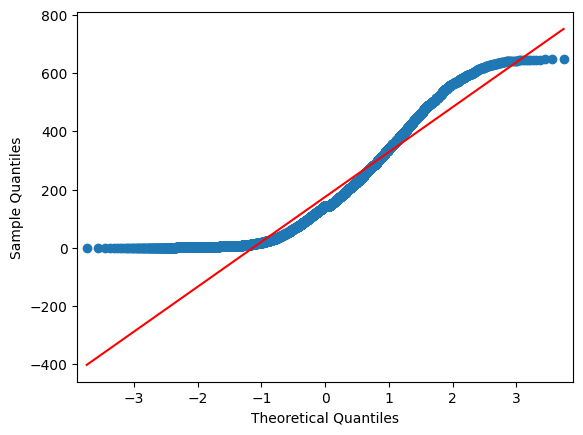

In [ ]:
qqplot(df['count'], line= 's')
plt.show()

Statistical test for normality

• HO: Data is normally distributed.

• H1: Data is not normally distributed.

In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = shapiro(df['count'].sample(100))

In [ ]:
test_statistics

0.8741297125816345

In [ ]:
p_value

1.0326224497703151e-07

The assumptions of ANONA is not met, so we use Kruskal-Wallis test for the same


• HO:- The demand of bicycles on rent is not same for different weather conditions.

• H1:- The demand of bicycles on rent is same for different weather conditions.


In [ ]:
alpha = 0.05


In [ ]:
test_statistics, p_value = kruskal(w1, w2, w3, w4)

test_statistics


nan

In [ ]:
p_value


nan

Check if the demand of bicycles on rent is the same for different Seasons?

Formulate Hypothesis

•HO:- The demand of bicycles on rent is not same for different seasons.

• H1:- The demand of bicycles on rent is same for different seasons

In [ ]:
alpha = 0.05


One way anova test

In [ ]:
s1 = df[df['season'] == 1]['count']
s2 = df[df['season'] == 2]['count']
s3 = df[df['season'] == 3]['count']
s4 = df[df['season'] == 4]['count']



<function matplotlib.pyplot.show(close=None, block=None)>

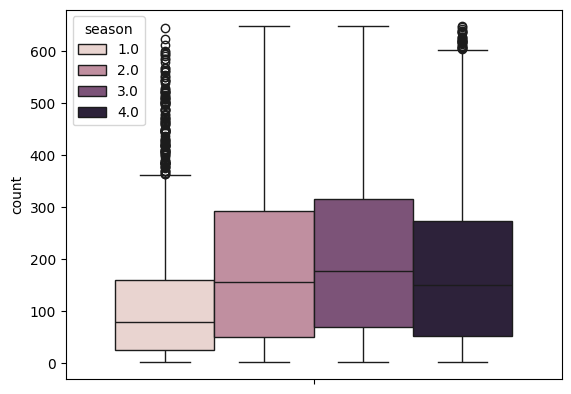

In [ ]:
sns.boxplot(data=df,y= 'count' ,hue= 'season')
plt.show()

Variance for each group is not same

In [ ]:
alpha = 0.05


Statistical test for variance.

•HO: Variance are same.

• H1: variance are difference.



In [ ]:
test_statistics,p_value = levene(s1,s2,s3,s4)

In [ ]:
test_statistics

146.91771249062793

In [ ]:
p_value

2.48621640518972e-93

#Conclusion

• alpha = 0.05

p_value = 1.0147116860043298e-118

• alpha > p_value.

• Reject the null hypothesis, we conclude that variance within each group is not same.


test for normality

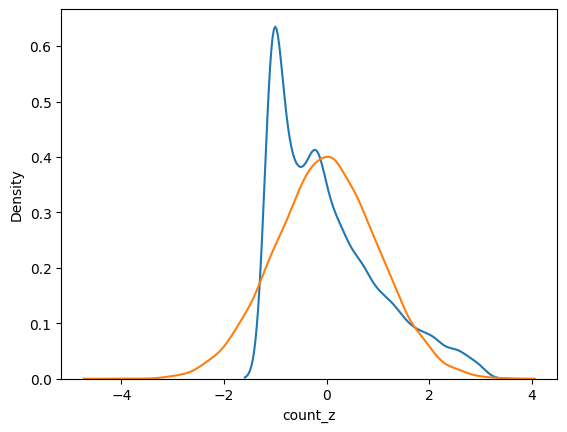

In [ ]:
sns.kdeplot(df['count_z'])

sns.kdeplot(data1)

plt.show()

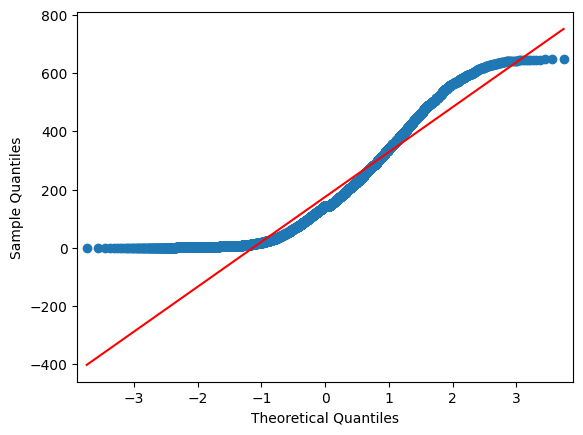

In [ ]:
qqplot(df['count'], line = 's')
plt.show()

Observation

the target on which we are computing the average is not normally distributed

Statistical test for normality

• HO: Data is normally distributed.

H1: Data is not normally distributed.

In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = shapiro(df['count'].sample(100))

In [ ]:
test_statistics

0.9182003736495972

In [ ]:
 p_value

1.13114328996744e-05

Conclusion

alpha = 0.05

p_value = 1.5827557717784657e-06

• alpha > p_value

Reject null hypothesis. So data is not normally distributed.



The assumptions of ANONA is not met, so we use Kruskal-Wallis test for the same

• HO:- The demand of bicycles on rent is not same for different seasons.

• H1:- The demand of bicycles on rent is same for different seasons.


In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = kruskal (s1, s2, s3, s4)

In [ ]:
test_statistics

638.6260243944532

In [ ]:
p_value

4.259539259769068e-138

Conclusion:

• alpha = 0.05

• p_value = 2.479008372608633e-151

• alpha > p_value

• Reject the null hypothesis. Therefore we conclude that the demand of bicycles on rent is same for different seasons.


#Check if the Weather conditions are significantly different during different Seasons?

Formulate Hypothesis

• HO:- The Weather conditions are significantly same during different Seasons..

• H1: The Weather conditions are significantly different during different Seasons.


In [ ]:
alpha = 0.05


In [ ]:
observed = pd.crosstab(df['weather'], df['season'])
observed

season,1.0,2.0,3.0,4.0
weather,,,,
1.0,1760,1801,1930,1702
2.0,715,708,604,807
3.0,211,224,199,225


In [ ]:
test_statistics, p_value, *all = chi2_contingency(observed)



In [ ]:
test_statistics



46.08664542500289

In [ ]:
p_value

2.8452582846245302e-08

conclusion


alpha = 0.05

p_value = 1.5499250736864862e-07

alpha > p_value.

• Reject the null hypothesis. Therefore we conclude that the Weather conditions are significantly different during different Seasons.